# Customer churn prediction: Telecom Churn Dataset

Customer churn, also known as customer retention, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics  because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

predictive analytics  use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.


- <a href='#1'>1. Data overview</a>
- <a href='#2'>2. Exploratory Data Analysis</a>
    - <a href='#2.1'>2.1. Customer churn in data</a>
    - <a href='#2.2'>2.2. Variable distributions</a>
- <a href='#3'>3. Data preprocessing</a>
    - <a href='#3.1'>3.1. Variable summary</a>
    - <a href='#3.2'>3.2. Correlation matrix</a>
    - <a href='#3.3'>3.3. Visualizing data with principal components</a>
    - <a href='#3.4'>3.4. Binary variable distributions in customer churn (Radar Chart)</a>
- <a href='#4'>4. Model Building</a>
    - <a href='#4.1'>4.1. Baseline model</a>
    - <a href='#4.2'>4.2. Synthetic Minority Oversampling TEchnique (SMOTE)</a>
    - <a href='#4.3'>4.3. Recursive Feature Elimination</a>
    - <a href='#4.4'>4.4. Univariate Selection</a>
    - <a href='#4.5'>4.5. Decision Tree Classifier</a> 
    - <a href='#4.6'>4.6. KNN Classifier</a>
    - <a href='#4.7'>4.7. Random Forest Classifier</a>
    - <a href='#4.8'>4.8. Gaussian Naive Bayes</a>
    - <a href='#4.9'>4.9. Support Vector Machine</a>
        - <a href='#4.9.1'>4.9.1. Support Vector Machine (linear)</a>
        - <a href='#4.9.2'>4.9.2. Support Vector Machine (rbf)</a>
    - <a href='#4.10'>4.10. LightGBM Classifier</a>
    - <a href='#4.11'>4.11. XGBoost Classifier</a>
    - <a href='#4.12'>4.12. Gaussian Process Classifier</a> 
    - <a href='#4.13'>4.13. AdaBoost Classifier</a> 
    - <a href='#4.14'>4.14. GradientBoosting Classifier</a>
    - <a href='#4.15'>4.15. Linear Discriminant Analysis</a> 
    - <a href='#4.16'>4.16. Quadratic Discriminant Analysis</a> 
    - <a href='#4.17'>4.17. Multi-layer Perceptron Classifier</a> 
    - <a href='#4.18'>4.18. Bagging Classifier</a>
- <a href='#5'>5. Model performances over the training dataset</a>
    - <a href='#5.1'>5.1. Model performance metrics</a>
    - <a href='#5.2'>5.2. Compare model metrics</a>
    - <a href='#5.3'>5.3. Confusion matrices for models</a>
    - <a href='#5.4'>5.4. ROC - Curves for models</a>
    - <a href='#5.5'>5.5. Precision recall curves</a>
- <a href='#6'>6. Model performances over the principal test dataset</a>
    - <a href='#6.1'>6.1. Model performance metrics</a>
    - <a href='#6.2'>6.2. Compare model metrics</a>
    - <a href='#6.3'>6.3. Confusion matrices for models</a>
    - <a href='#6.4'>6.4. ROC - Curves for models</a>
    - <a href='#6.5'>6.5. Precision recall curves</a>
    

In [ ]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import * # module math
import matplotlib.pyplot as plt # visualization
from PIL import Image
import seaborn as sns # visualization
import itertools
import io
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%matplotlib inline

# <a id='1'>1. Data overview</a>

In [2]:
telcom = pd.read_csv(r"../input/telecom-churn-datasets/churn-bigml-80.csv")
telcom_test = pd.read_csv(r"../input/telecom-churn-datasets/churn-bigml-20.csv")
telcom.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [3]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(telcom.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [4]:
dataoveriew(telcom, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 2666

Number of features: 20

Features:
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

Missing values: 0

Unique values:
State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         15

In [5]:
dataoveriew(telcom_test, 'Overiew of the test dataset')

Overiew of the test dataset:

Rows: 667

Number of features: 20

Features:
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

Missing values: 0

Unique values:
State                      51
Account length            179
Area code                   3
International plan          2
Voice mail plan             2
Number vmail messages      37
Total day minutes         562
Total day calls           100
Total day charge          562
Total eve minutes         557
Total eve calls            94
Total eve charge          528
Total night minutes       568
Total night calls          96
Total night charge        453
Total intl minutes        132
Total intl calls   

# <a id='2'>2. Exploratory Data Analysis</a>

## <a id='2.1'>2.1. Customer churn in data</a>

In [6]:
trace = go.Pie(labels = telcom["Churn"].value_counts().keys().tolist(),
               values = telcom["Churn"].value_counts().values.tolist(),
               marker = dict(colors = ['royalblue','lime'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer churn in training data",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

## <a id='2.2'>2.2. Variable distributions</a>

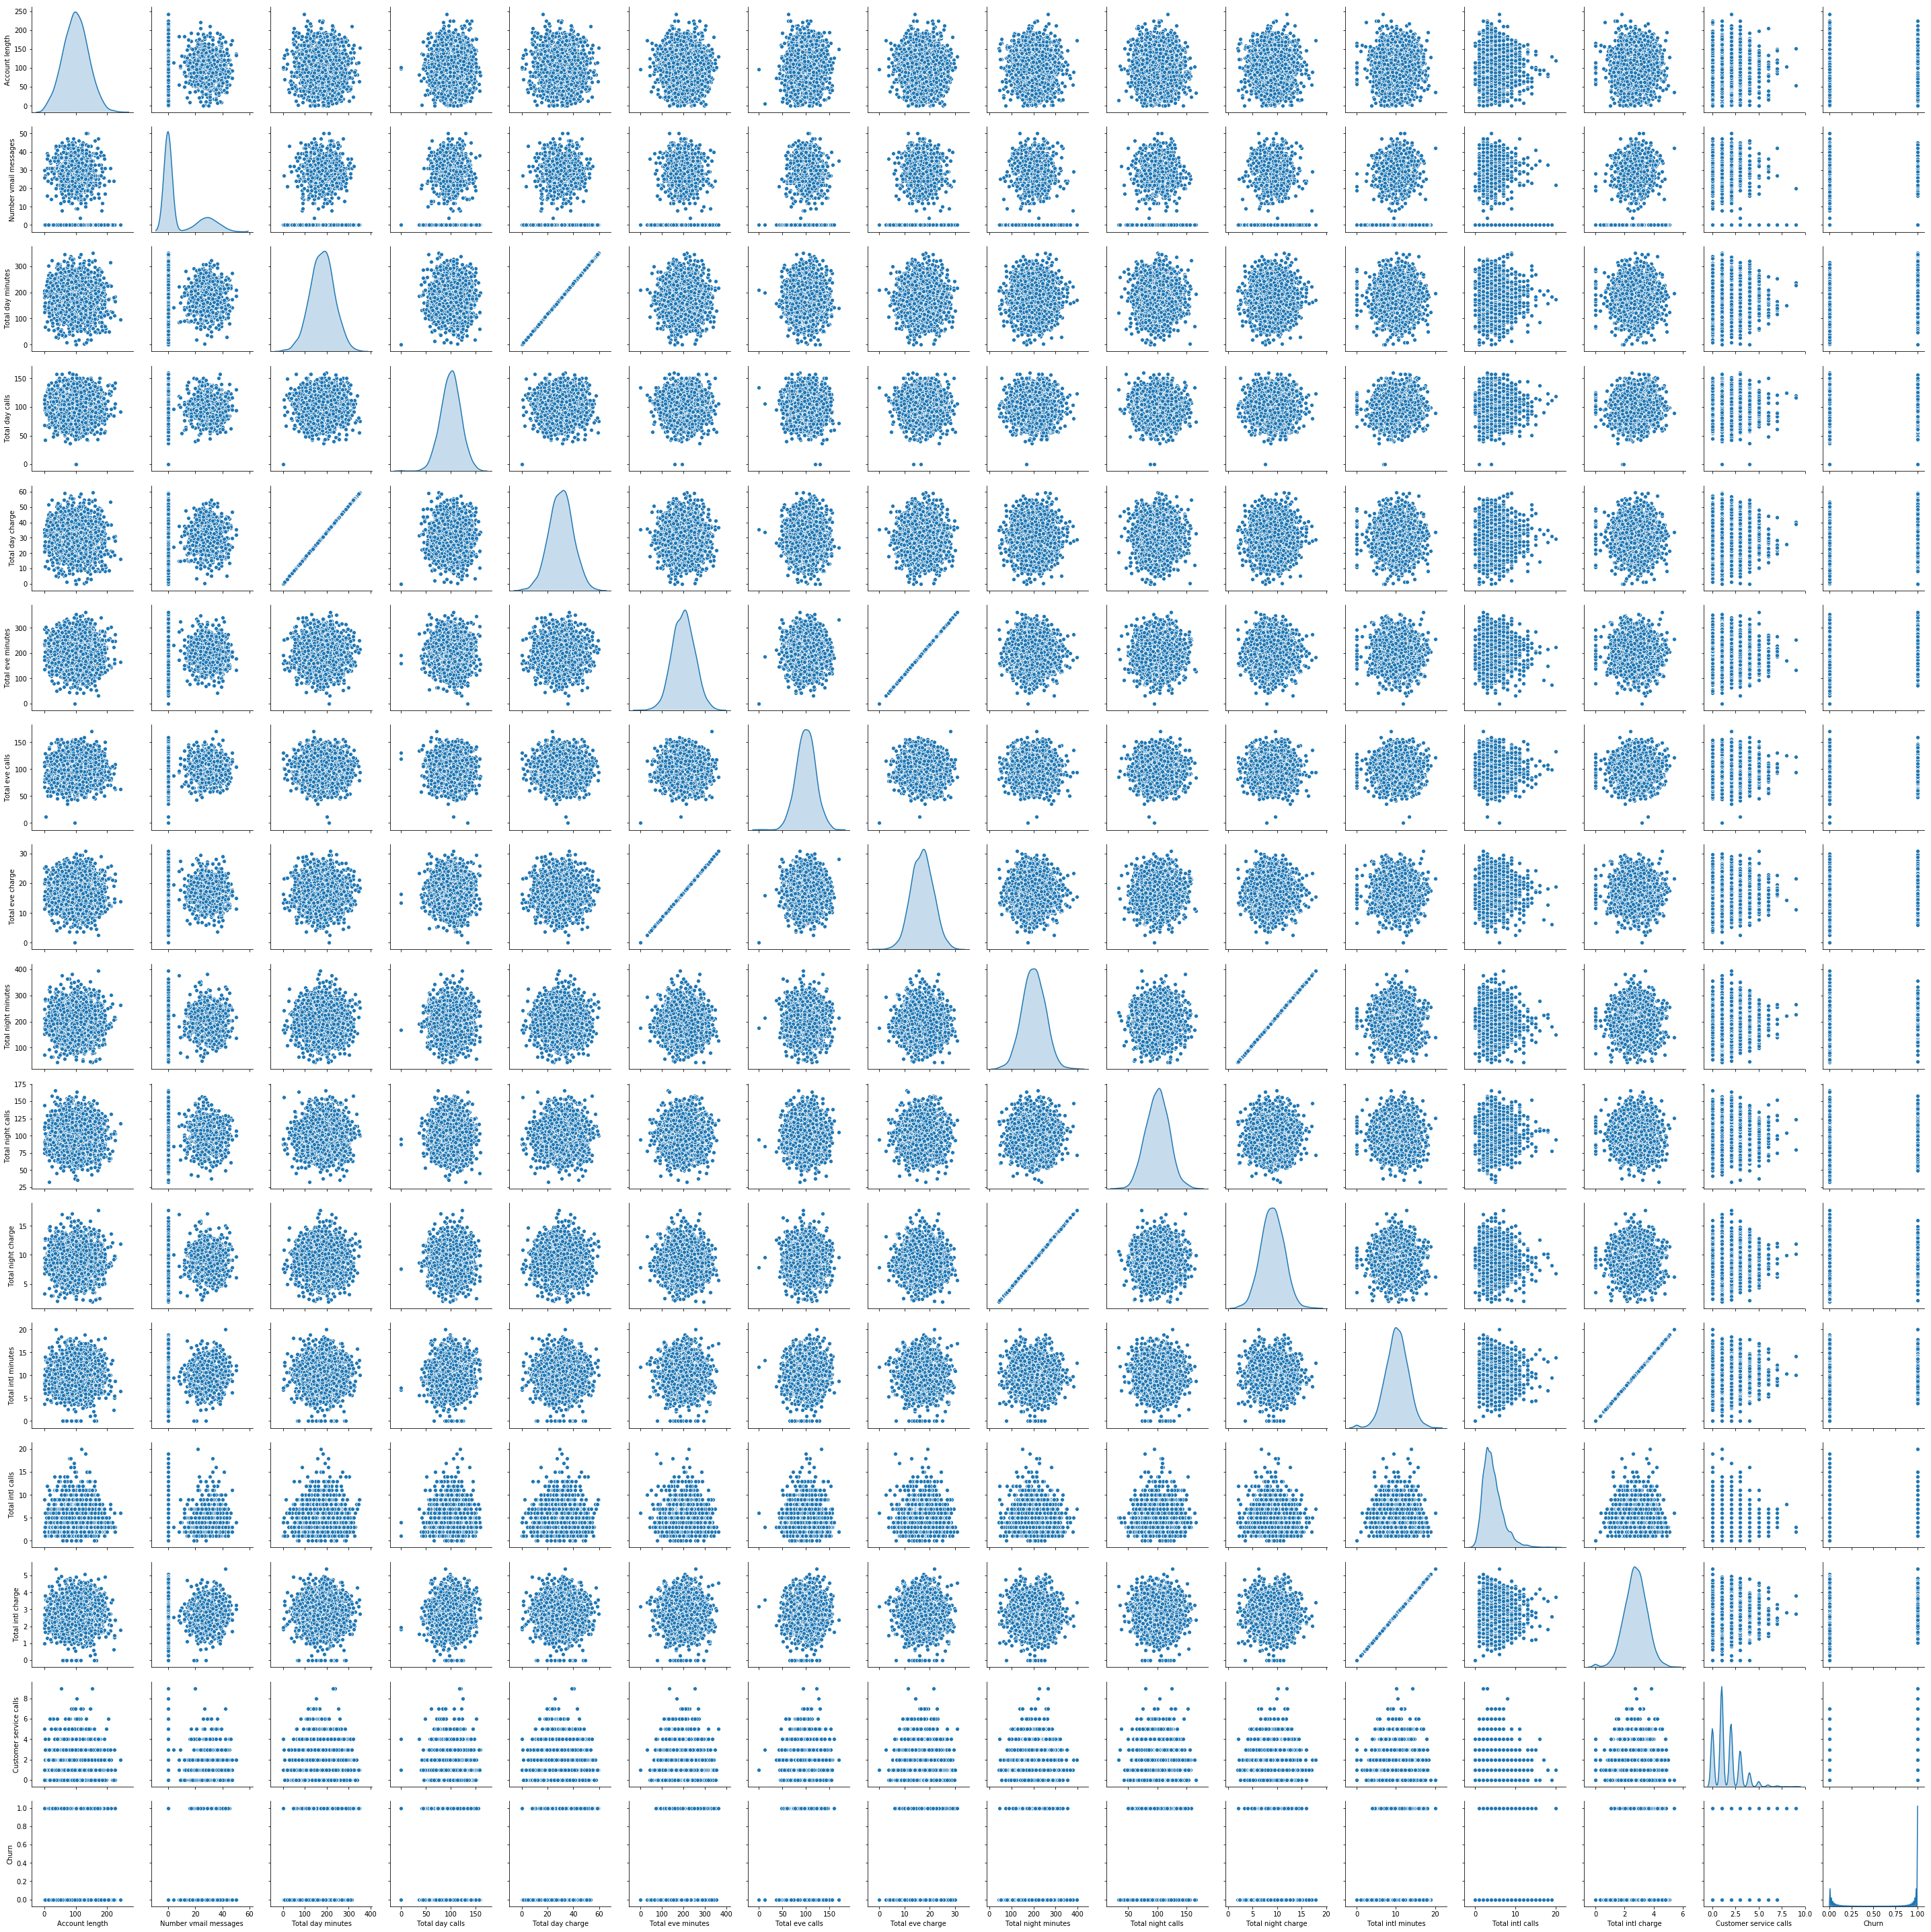

In [7]:
#Separating columns to be visualized
out_cols = list(set(telcom.nunique()[telcom.nunique()<6].keys().tolist()
                    + telcom.select_dtypes(include='object').columns.tolist()))
viz_cols = [x for x in telcom.columns if x not in out_cols] + ['Churn']

sns.pairplot(telcom[viz_cols], diag_kind="kde")
plt.show()

Several of the numerical data are very correlated. (Total day minutes and Total day charge), (Total eve minutes and Total eve charge), (Total night minutes and Total night charge) and lastly (Total intl minutes and Total intl charge) are alo correlated. We only have to select one of them.

# <a id='3'>3. Data preprocessing</a>

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Removing correlated and unneccessary columns
col_to_drop = ['State', 'Area code', 'Total day charge', 'Total eve charge', 
               'Total night charge', 'Total intl charge']
   
telcom = telcom.drop(columns = col_to_drop, axis = 1)
telcom_test = telcom_test.drop(columns = col_to_drop, axis = 1)

#target column
target_col = ["Churn"]

#number of levels in feature to be a categorical feature
nlevels = 6

#Separating categorical and numerical columns
#categorical columns
cat_cols = list(set(telcom.nunique()[telcom.nunique()<nlevels].keys().tolist() 
                    + telcom.select_dtypes(include='object').columns.tolist()))
cat_cols = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols = [x for x in telcom.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols:
    telcom[i] = le.fit_transform(telcom[i])
    telcom_test[i] = le.transform(telcom_test[i])

#combining the train and test datasets
trainsize = telcom.shape[0]
comb = pd.concat((telcom, telcom_test), sort=False)

#Duplicating columns for multi value columns
comb = pd.get_dummies(data = comb, columns = multi_cols)

#Separating the train and test datasets
telcom = comb[:trainsize]
telcom_test = comb[trainsize:]

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

scaled_test = std.transform(telcom_test[num_cols])
scaled_test = pd.DataFrame(scaled_test, columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols, axis = 1)
telcom = telcom.merge(scaled, left_index=True, right_index=True, how = "left")

df_telcom_test_og = telcom_test.copy()
telcom_test = telcom_test.drop(columns = num_cols, axis = 1)
telcom_test = telcom_test.merge(scaled_test, left_index=True, right_index=True, how = "left")

## <a id='3.1'>3.1. Variable summary</a>

In [9]:
summary = (df_telcom_og[[i for i in df_telcom_og.columns]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Training variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

## <a id='3.2'>3.2. Correlation matrix</a>

In [10]:
#correlation
correlation = telcom.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar = dict(title = "Pearson Correlation coefficients", titleside = "right"),
                  )
layout = go.Layout(dict(title = "Correlation matrix",
                        autosize = False,
                        height = 720,
                        width = 800,
                        margin = dict(r = 0, l = 210, t = 25, b = 210),
                        yaxis = dict(tickfont = dict(size = 9)),
                        xaxis = dict(tickfont = dict(size = 9))
                       )
                  )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## <a id='3.3'>3.3. Visualizing data with principal components</a>

In [11]:
def pca_scatter(pcadf, targetfeature, targetlabel, color):
    tracer = go.Scatter(x = pcadf[pcadf[targetfeature]==targetlabel]["PC1"],
                        y = pcadf[pcadf[targetfeature]==targetlabel]["PC2"],
                        name = targetlabel, mode = "markers",
                        marker = dict(color = color, line = dict(width = .5), symbol = "diamond-open"),
                       )
    return tracer

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X = telcom[[i for i in telcom.columns if i not in target_col]]
Y = telcom[target_col]

principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components, columns = ["PC1", "PC2"])
pca_data = pca_data.merge(Y, left_index=True, right_index=True, how="left")
pca_data["Churn"] = pca_data["Churn"].replace({1: "Churn", 0: "Not churn"})

layout = go.Layout(dict(title = "Visualizing data with PCA",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "first principal component (PC1)",
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "second principal component (PC2)",
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        height = 400
                       )
                  )
trace1 = pca_scatter(pca_data, 'Churn', 'Churn', 'red')
trace2 = pca_scatter(pca_data, 'Churn', 'Not churn', 'royalblue')
data = [trace2, trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## <a id='3.4'>3.4. Binary variable distribution in customer churn (Radar Chart)</a>

In [13]:
def plot_radar(df, aggregate, title):
    data_frame = df[df["Churn"] == aggregate] 
    data_frame_x = data_frame[bi_cs].sum().reset_index()
    data_frame_x.columns = ["feature", "yes"]
    data_frame_x["no"] = data_frame.shape[0] - data_frame_x["yes"]
    data_frame_x = data_frame_x[data_frame_x["feature"] != "Churn"]
    
    #count of 1's (yes)
    trace1 = go.Scatterpolar(r = data_frame_x["yes"].values.tolist(),
                             theta = data_frame_x["feature"].tolist(),
                             fill = "toself", 
                             name = "count of 1's",
                             mode = "markers+lines",
                             marker = dict(size = 5)
                            )
    #count of 0's (no)
    trace2 = go.Scatterpolar(r = data_frame_x["no"].values.tolist(),
                             theta = data_frame_x["feature"].tolist(),
                             fill = "toself", 
                             name = "count of 0's",
                             mode = "markers+lines",
                             marker = dict(size = 5)
                            ) 
    layout = go.Layout(dict(polar = dict(radialaxis = dict(visible = True,
                                                           side = "counterclockwise",
                                                           showline = True,
                                                           linewidth = 2,
                                                           tickwidth = 2,
                                                           gridcolor = "white",
                                                           gridwidth = 2),
                                         angularaxis = dict(tickfont = dict(size = 10),
                                                            layer = "below traces"
                                                           ),
                                         bgcolor = "rgb(243,243,243)",
                                        ),
                            paper_bgcolor = "rgb(243,243,243)",
                            title = title, height = 600, width = 600))
    
    data = [trace2, trace1]
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

In [14]:
#separating binary columns
bi_cs = telcom.nunique()[telcom.nunique() == 2].keys()
dat_rad = telcom[bi_cs]

#plotting radar chart for churn and not churn customers (binary variables)
plot_radar(dat_rad, 1, "Churn customers")
plot_radar(dat_rad, 0, "Not churn customers")

# <a id='4'>4. Model Building</a>

In [15]:
def telecom_churn_prediction(algorithm, training_x, testing_x, training_y, testing_y, cf, threshold_plot):
    #model
    algorithm.fit(training_x, training_y)
    predictions = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
        
    print('Algorithm:', type(algorithm).__name__)
    print("\nClassification report:\n", classification_report(testing_y, predictions))
    print("Accuracy Score:", accuracy_score(testing_y, predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y, predictions) 
    print("Area under curve:", model_roc_auc,"\n")
    
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:,1])
     
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix,
                        x = ["Not churn", "Churn"],
                        y = ["Not churn", "Churn"],
                        showscale = False, colorscale = "Picnic",
                        name = "Confusion matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr, y = tpr,
                        name = "Roc: " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'), width = 2))
    trace3 = go.Scatter(x = [0,1], y = [0,1],
                        line = dict(color = ('rgb(205, 12, 24)'), width = 2,
                        dash = 'dot'))
    
    if cf in ['coefficients', 'features']:
        if cf == 'coefficients':
            coefficients = pd.DataFrame(algorithm.coef_.ravel())
        elif cf == 'features':
            coefficients = pd.DataFrame(algorithm.feature_importances_)
        
        column_df = pd.DataFrame(training_x.columns.tolist())
        coef_sumry = (pd.merge(coefficients, column_df, left_index=True, 
                               right_index=True, how="left"))
        coef_sumry.columns = ["coefficients", "features"]
        coef_sumry = coef_sumry.sort_values(by = "coefficients", ascending=False)
        
        #plot coeffs
        trace4 = go.Bar(x = coef_sumry["features"], y = coef_sumry["coefficients"], 
                        name = "coefficients",
                        marker = dict(color = coef_sumry["coefficients"],
                                      colorscale = "Picnic",
                                      line = dict(width = .6, color = "black")
                                     )
                       )
        #subplots
        fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                                subplot_titles=('Confusion matrix',
                                                'Receiver operating characteristic',
                                                'Feature importances')
                           )  
        fig.append_trace(trace1,1,1)
        fig.append_trace(trace2,1,2)
        fig.append_trace(trace3,1,2)
        fig.append_trace(trace4,2,1)
        fig['layout'].update(showlegend=False, title="Model performance",
                             autosize=False, height = 900, width = 800,
                             plot_bgcolor = 'rgba(240,240,240, 0.95)',
                             paper_bgcolor = 'rgba(240,240,240, 0.95)',
                             margin = dict(b = 195))
        fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
        fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
        fig["layout"]["xaxis3"].update(dict(showgrid = True, tickfont = dict(size = 10), tickangle = 90))
        
    elif cf == 'None':
        #subplots
        fig = make_subplots(rows=1, cols=2,
                            subplot_titles=('Confusion matrix',
                                            'Receiver operating characteristic')
                           )
        fig.append_trace(trace1,1,1)
        fig.append_trace(trace2,1,2)
        fig.append_trace(trace3,1,2)
        fig['layout'].update(showlegend=False, title="Model performance",
                         autosize=False, height = 500, width = 800,
                         plot_bgcolor = 'rgba(240,240,240,0.95)',
                         paper_bgcolor = 'rgba(240,240,240,0.95)',
                         margin = dict(b = 195))
        fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
        fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))  
        
    py.iplot(fig)
    
    if threshold_plot == True: 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve,scorer, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score

import statsmodels.api as sm
from yellowbrick.classifier import DiscriminationThreshold

#defining the studied or used independent features (columns) as well the target  
cols = [i for i in telcom.columns if i not in target_col]
target_col = ['Churn']

#splitting the principal training dataset to subtrain and subtest datasets
x_train, x_test, y_train, y_test = train_test_split(telcom[cols], telcom[target_col], 
                                                    test_size = .25, random_state = 111)

#splitting the no scaled principal training dataset to subtrain and subtest datasets
x_train_og, x_test_og, y_train_og, y_test_og = train_test_split(df_telcom_og[cols], telcom[target_col],
                                                                test_size = .25, random_state = 111)

## <a id='4.1'>4.1. Baseline model</a>

Algorithm: LogisticRegression

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       547
           1       0.52      0.13      0.21       120

    accuracy                           0.82       667
   macro avg       0.68      0.55      0.56       667
weighted avg       0.78      0.82      0.78       667

Accuracy Score: 0.8215892053973014
Area under curve: 0.5529555149299208 



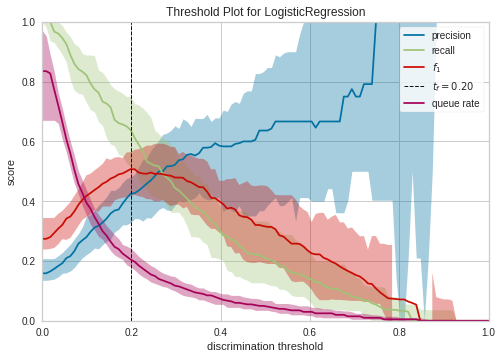

In [17]:
from sklearn.linear_model import LogisticRegression

#Baseline model        
logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                           verbose=0, warm_start=False)

telecom_churn_prediction(logit, x_train, x_test, y_train, y_test, "coefficients", threshold_plot=True)

## <a id='4.2'>4.2. Synthetic Minority Oversampling TEchnique (SMOTE)</a>
* Randomly pick a point from the minority class.
* Compute the k-nearest neighbors (for some pre-specified k) for this point.
* Add k new points somewhere between the chosen point and each of its neighbors

Using TensorFlow backend.


Algorithm: LogisticRegression

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.79      0.85       547
           1       0.41      0.66      0.50       120

    accuracy                           0.77       667
   macro avg       0.66      0.72      0.68       667
weighted avg       0.82      0.77      0.79       667

Accuracy Score: 0.767616191904048
Area under curve: 0.7249619134673979 



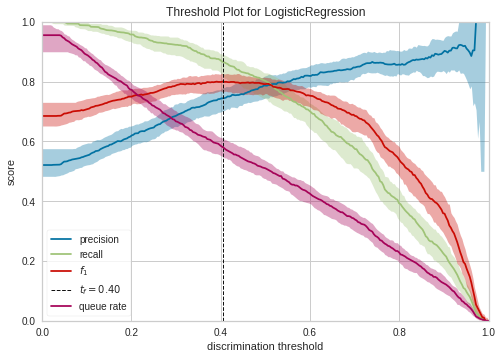

In [18]:
from imblearn.over_sampling import SMOTE

#oversampling minority class using smote
smote = SMOTE(random_state = 0)
x_smote, y_smote = smote.fit_sample(x_train, y_train)
x_smote = pd.DataFrame(data = x_smote, columns=cols)
y_smote = pd.DataFrame(data = y_smote, columns=target_col)

logit_smote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                                 penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                                 verbose=0, warm_start=False)

telecom_churn_prediction(logit_smote, x_smote, x_test, y_smote, y_test, "coefficients", threshold_plot=True)

## <a id='4.3'>4.3. Recursive Feature Elimination</a>
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

Algorithm: LogisticRegression

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       547
           1       0.50      0.13      0.21       120

    accuracy                           0.82       667
   macro avg       0.67      0.55      0.55       667
weighted avg       0.78      0.82      0.77       667

Accuracy Score: 0.8200899550224887
Area under curve: 0.552041438147471 



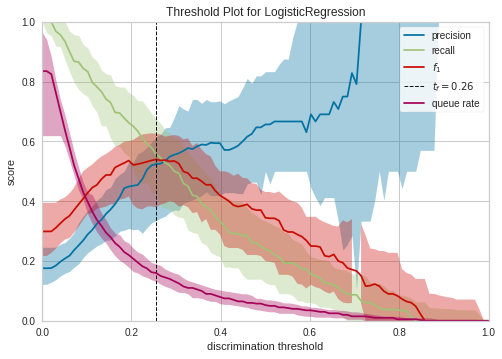

In [19]:
from sklearn.feature_selection import RFE

logit_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                               intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                               penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                               verbose=0, warm_start=False)


rfe = RFE(logit_rfe, 10)
rfe = rfe.fit(x_train, y_train.values.ravel())

#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support": rfe.support_,
                        "columns": cols,
                        "ranking": rfe.ranking_,
                       })
cols_rfe = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()

#applying model
telecom_churn_prediction(logit_rfe, x_train[cols_rfe], x_test[cols_rfe], y_train, y_test, "coefficients", threshold_plot=True)

table_rk = ff.create_table(idc_rfe)
py.iplot(table_rk)

## <a id='4.4'>4.4. Univariate Selection</a>
* Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
* uses the chi squared ($\chi^2$) statistical test for non-negative features to select the best features

In [20]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#dataframe with non negative values
x_df = df_telcom_og[cols]
y_df = df_telcom_og[target_col]

#fit model with k= 3
select = SelectKBest(score_func = chi2, k = 3)
select = select.fit(x_df, y_df)

#create dataframe
score = pd.DataFrame({"features": cols, "scores": select.scores_, "p_values": select.pvalues_ })
score = score.sort_values(by = "scores", ascending=False)

#createing new label for categorical and numerical columns
score["feature_type"] = np.where(score["features"].isin(num_cols), "Numerical", "Categorical")

table_score = ff.create_table(score)
py.iplot(table_score)

#plot
trace1 = go.Scatter(x = score[score["feature_type"]=="Categorical"]["features"],
                   y = score[score["feature_type"]=="Categorical"]["scores"],
                   name = "Categorial", mode = "lines+markers",
                   marker = dict(color = "red", line = dict(width =1))
                   )

trace2 = go.Bar(x = score[score["feature_type"]=="Numerical"]["features"],
                y = score[score["feature_type"]=="Numerical"]["scores"], name = "Numerical",
                marker = dict(color = "royalblue", line = dict(width =1)),
                xaxis = "x2", yaxis = "y2"
               )
layout = go.Layout(dict(title = "Scores for Categorical & Numerical features",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     tickfont = dict(size =10),
                                     domain=[0, 0.7],
                                     tickangle = 90, zerolinewidth=1,
                                     ticklen=5, gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "scores",
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        margin = dict(b=200),
                        xaxis2=dict(domain=[0.8, 1], tickangle = 90, gridcolor = 'rgb(255, 255, 255)'),
                        yaxis2=dict(anchor='x2', gridcolor = 'rgb(255, 255, 255)')
                        )
                  )

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## <a id='4.5'>4.5. Decision Tree Classifier</a>


In [21]:
def treeplot(classifier, cols, classnames):
    #plot decision tree
    graph = Source(tree.export_graphviz(classifier, out_file=None, 
                                        rounded=True, proportion=False,
                                        feature_names = cols, 
                                        precision = 2,
                                        class_names = classnames,
                                        filled = True)
                  )
    display(graph)

Algorithm: DecisionTreeClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       547
           1       0.79      0.63      0.70       120

    accuracy                           0.90       667
   macro avg       0.86      0.80      0.82       667
weighted avg       0.90      0.90      0.90       667

Accuracy Score: 0.904047976011994
Area under curve: 0.7983851310176721 



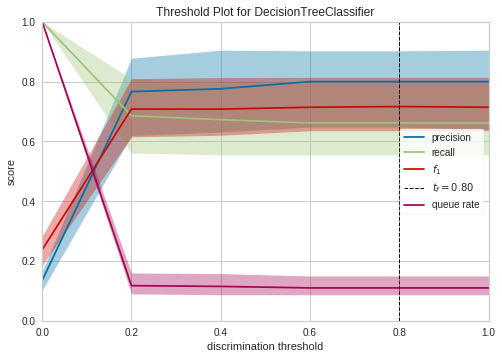

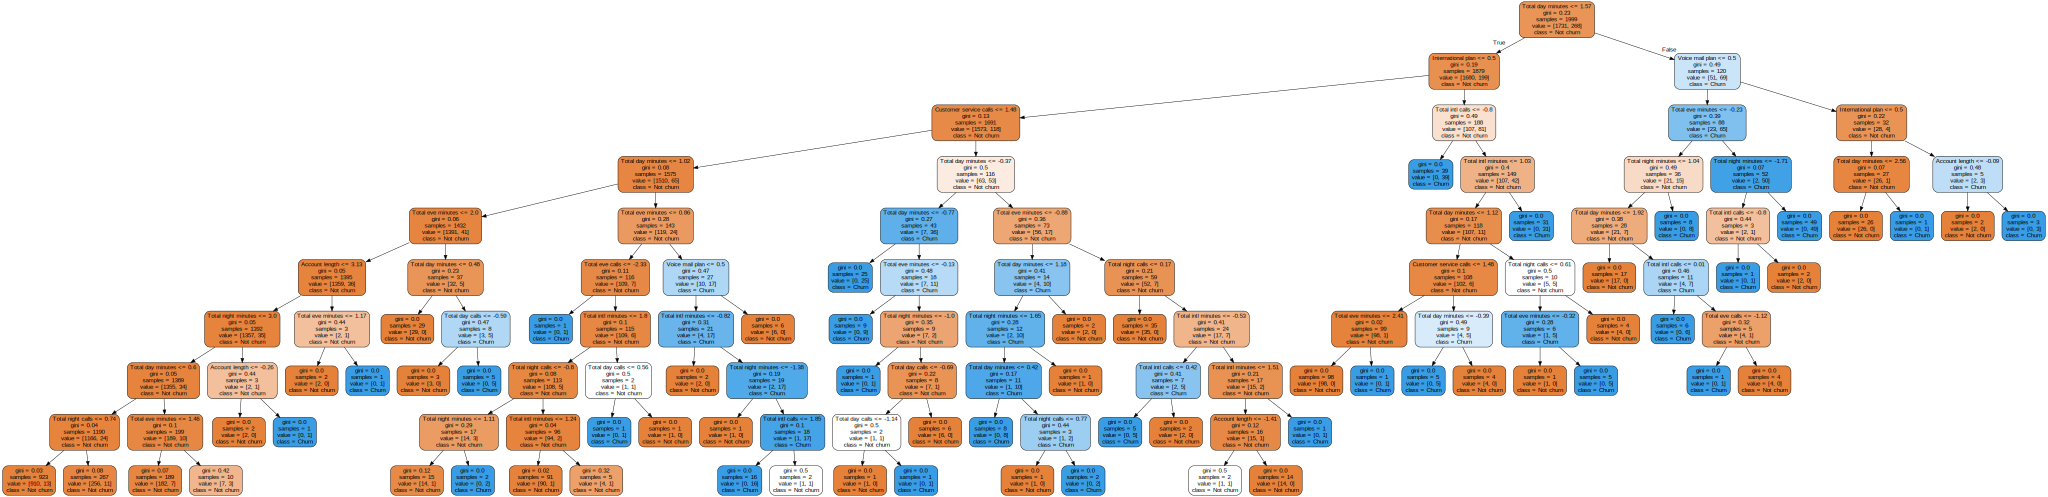

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG, display

decision_tree = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")

telecom_churn_prediction(decision_tree, x_train, x_test, y_train, y_test, "features", threshold_plot=True)

#plot decision tree
treeplot(decision_tree, cols, ["Not churn", "Churn"])

## <a id='4.6'>4.6. KNN Classifier</a>


Algorithm: KNeighborsClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       547
           1       0.91      0.17      0.29       120

    accuracy                           0.85       667
   macro avg       0.88      0.59      0.60       667
weighted avg       0.86      0.85      0.80       667

Accuracy Score: 0.848575712143928
Area under curve: 0.5856718464351005 



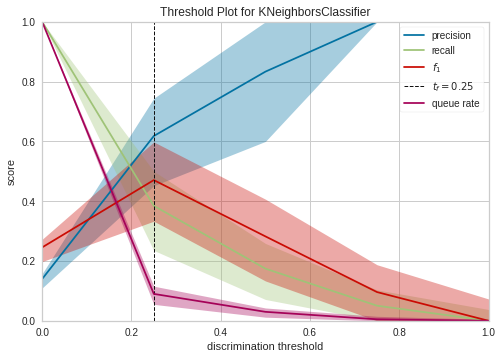

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                           weights='uniform')
telecom_churn_prediction(knn, x_train, x_test, y_train, y_test, 'None', threshold_plot=True)

## <a id='4.7'>4.7. Random Forest Classifier</a>
Random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

Algorithm: RandomForestClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       547
           1       0.92      0.56      0.69       120

    accuracy                           0.91       667
   macro avg       0.91      0.77      0.82       667
weighted avg       0.91      0.91      0.90       667

Accuracy Score: 0.9115442278860569
Area under curve: 0.7736822059719684 



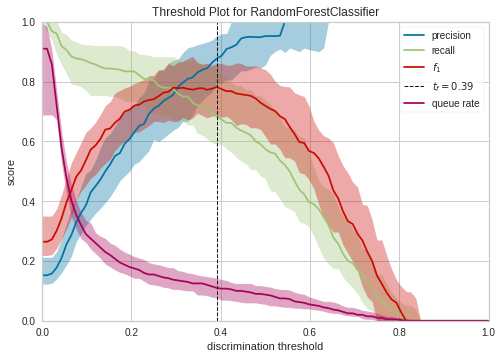

In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, random_state = 123,
                             max_depth = 9, criterion = "gini")

telecom_churn_prediction(rfc, x_train, x_test, y_train, y_test, 'features', threshold_plot=True)

## <a id='4.8'>4.8. Gaussian Naive Bayes</a>

Algorithm: GaussianNB

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       547
           1       0.50      0.35      0.41       120

    accuracy                           0.82       667
   macro avg       0.68      0.64      0.65       667
weighted avg       0.80      0.82      0.81       667

Accuracy Score: 0.8200899550224887
Area under curve: 0.6366087751371116 



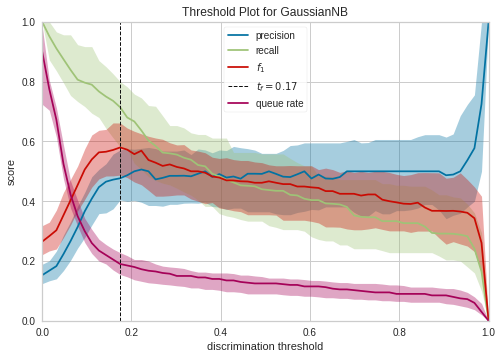

In [25]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB(priors=None)

telecom_churn_prediction(gnb, x_train, x_test, y_train, y_test, 'None', threshold_plot=True)

## <a id='4.9'>4.9. Support Vector Machine</a>
“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges.   it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space .where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes.

### <a id='4.9.1'>4.9.1. Support Vector Machine (linear)</a>

Algorithm: SVC

Classification report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       547
           1       0.00      0.00      0.00       120

    accuracy                           0.82       667
   macro avg       0.41      0.50      0.45       667
weighted avg       0.67      0.82      0.74       667

Accuracy Score: 0.8200899550224887
Area under curve: 0.5 



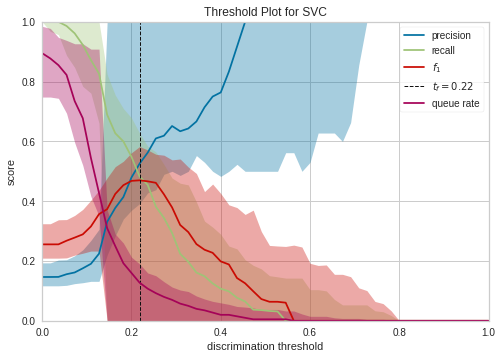

In [26]:
from sklearn.svm import SVC

#Support vector classifier using linear hyper plane
svc_lin  = SVC(C=1.0, kernel='linear', probability=True, random_state=124)

telecom_churn_prediction(svc_lin, x_train, x_test, y_train, y_test, "coefficients", threshold_plot=True)

### <a id='4.9.2'>4.9.2. Support Vector Machine (rbf)</a>

Algorithm: SVC

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       547
           1       0.81      0.61      0.70       120

    accuracy                           0.90       667
   macro avg       0.86      0.79      0.82       667
weighted avg       0.90      0.90      0.90       667

Accuracy Score: 0.904047976011994
Area under curve: 0.7886273613650213 



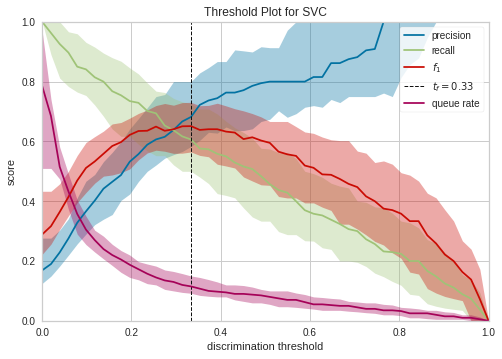

In [27]:
#support vector classifier using non-linear hyper plane ("rbf")
svc_rbf  = SVC(C=10.0, kernel='rbf', gamma=0.1, probability=True, random_state=124)   

telecom_churn_prediction(svc_rbf, x_train, x_test, y_train, y_test, "None", threshold_plot=True)

## <a id='4.10'>4.10. LightGBM Classifier</a>

Algorithm: LGBMClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       547
           1       0.94      0.72      0.82       120

    accuracy                           0.94       667
   macro avg       0.94      0.86      0.89       667
weighted avg       0.94      0.94      0.94       667

Accuracy Score: 0.9415292353823088
Area under curve: 0.8570155393053016 



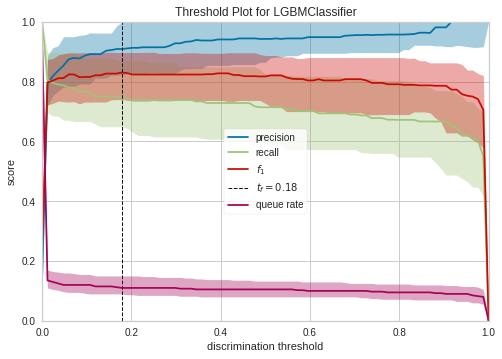

In [28]:
from lightgbm import LGBMClassifier

lgbmc = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        learning_rate=0.5, max_depth=7, min_child_samples=20,
                        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
                        n_jobs=-1, num_leaves=500, objective='binary', random_state=None,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                        subsample_for_bin=200000, subsample_freq=0)

telecom_churn_prediction(lgbmc, x_train, x_test, y_train, y_test, "features", threshold_plot=True)

## <a id='4.11'>4.11. XGBoost  Classifier</a>

Algorithm: XGBClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       547
           1       0.91      0.71      0.80       120

    accuracy                           0.94       667
   macro avg       0.93      0.85      0.88       667
weighted avg       0.93      0.94      0.93       667

Accuracy Score: 0.9355322338830585
Area under curve: 0.846854052407069 



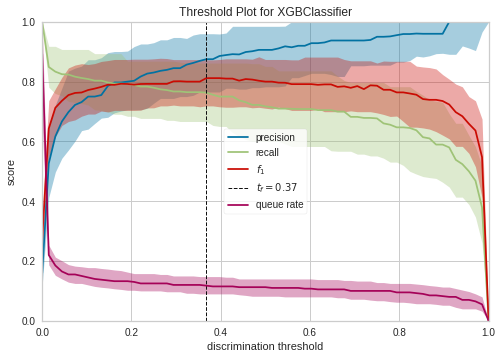

In [29]:
from xgboost import XGBClassifier

xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)

telecom_churn_prediction(xgc, x_train, x_test, y_train, y_test, "features", threshold_plot=True)

## <a id='4.12'>4.12. Gaussian Process Classifier</a> 

Algorithm: GaussianProcessClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       547
           1       0.95      0.17      0.28       120

    accuracy                           0.85       667
   macro avg       0.90      0.58      0.60       667
weighted avg       0.86      0.85      0.80       667

Accuracy Score: 0.848575712143928
Area under curve: 0.5824192565508837 



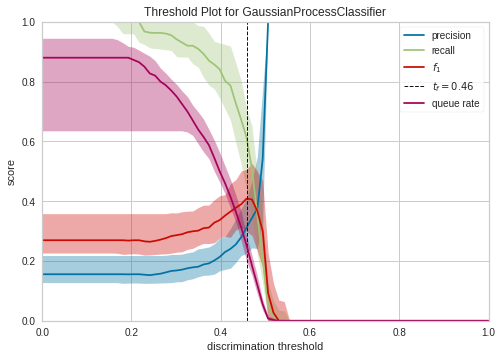

In [30]:
from sklearn.gaussian_process import GaussianProcessClassifier

gpc = GaussianProcessClassifier(random_state=124)

telecom_churn_prediction(gpc, x_train, x_test, y_train, y_test, "None", threshold_plot=True)

## <a id='4.13'>4.13. AdaBoost Classifier</a> 

Algorithm: AdaBoostClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       547
           1       0.66      0.32      0.43       120

    accuracy                           0.85       667
   macro avg       0.76      0.64      0.67       667
weighted avg       0.83      0.85      0.82       667

Accuracy Score: 0.8470764617691154
Area under curve: 0.6400517976843388 



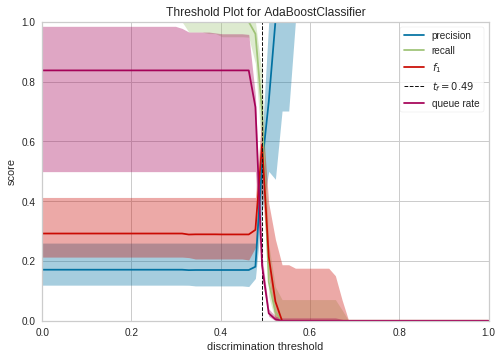

In [31]:
from sklearn.ensemble import AdaBoostClassifier

adac = AdaBoostClassifier(random_state=124)

telecom_churn_prediction(adac, x_train, x_test, y_train, y_test, "features", threshold_plot=True)

## <a id='4.14'>4.14. GradientBoosting Classifier</a> 

Algorithm: GradientBoostingClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       547
           1       0.94      0.66      0.77       120

    accuracy                           0.93       667
   macro avg       0.94      0.82      0.87       667
weighted avg       0.93      0.93      0.93       667

Accuracy Score: 0.9310344827586207
Area under curve: 0.824596282754418 



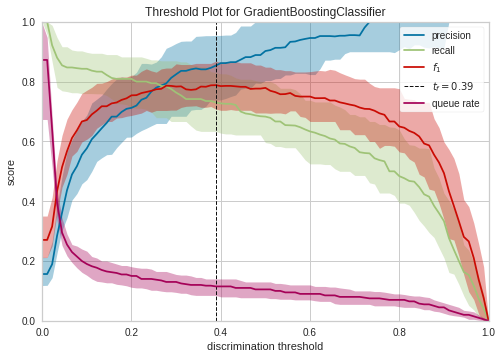

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=124)

telecom_churn_prediction(gbc, x_train, x_test, y_train, y_test, "features", threshold_plot=True)

## <a id='4.15'>4.15. Linear Discriminant Analysis</a> 

Algorithm: LinearDiscriminantAnalysis

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       547
           1       0.51      0.22      0.30       120

    accuracy                           0.82       667
   macro avg       0.68      0.59      0.60       667
weighted avg       0.79      0.82      0.79       667

Accuracy Score: 0.8215892053973014
Area under curve: 0.5854814137720903 



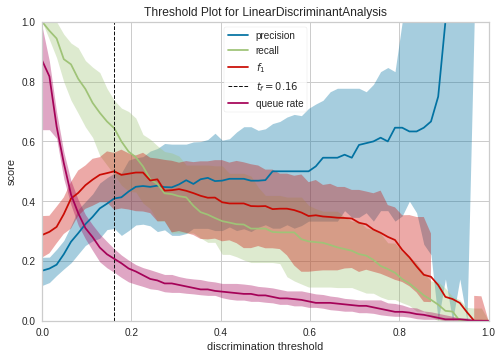

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

telecom_churn_prediction(lda, x_train, x_test, y_train, y_test, "None", threshold_plot=True)

## <a id='4.15'>4.16. Quadratic Discriminant Analysis</a> 

Algorithm: QuadraticDiscriminantAnalysis

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       547
           1       0.57      0.45      0.50       120

    accuracy                           0.84       667
   macro avg       0.73      0.69      0.71       667
weighted avg       0.83      0.84      0.83       667

Accuracy Score: 0.841079460269865
Area under curve: 0.688436928702011 



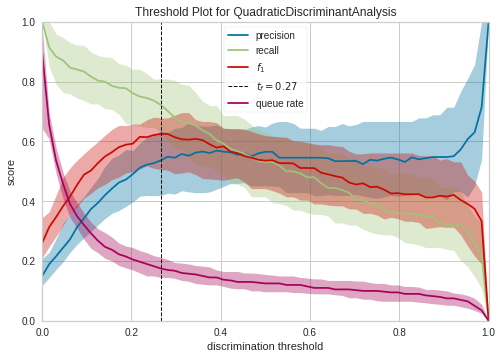

In [34]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

telecom_churn_prediction(qda, x_train, x_test, y_train, y_test, "None", threshold_plot=True)

## <a id='4.17'>4.17. Multi-layer Perceptron Classifier</a> 

Algorithm: MLPClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       547
           1       0.90      0.53      0.66       120

    accuracy                           0.90       667
   macro avg       0.90      0.76      0.80       667
weighted avg       0.90      0.90      0.89       667

Accuracy Score: 0.904047976011994
Area under curve: 0.7561014625228518 



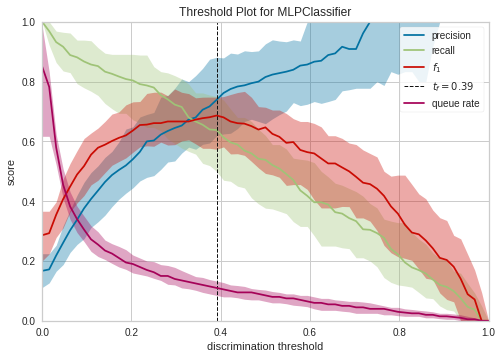

In [35]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=1000, random_state=124)

telecom_churn_prediction(mlp, x_train, x_test, y_train, y_test, "None", threshold_plot=True)

## <a id='4.18'>4.18. Bagging Classifier</a> 

Algorithm: BaggingClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       547
           1       0.87      0.67      0.75       120

    accuracy                           0.92       667
   macro avg       0.90      0.82      0.85       667
weighted avg       0.92      0.92      0.92       667

Accuracy Score: 0.9220389805097451
Area under curve: 0.8223644119439366 



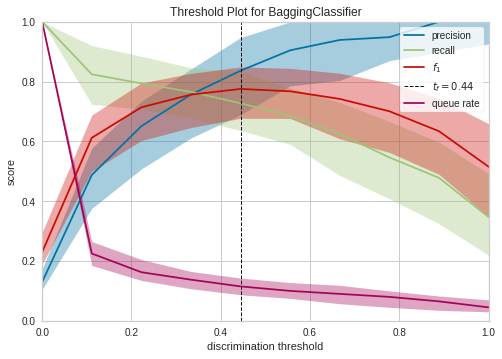

In [36]:
from sklearn.ensemble.bagging import BaggingClassifier

bgc = BaggingClassifier(random_state=124)

telecom_churn_prediction(bgc, x_train, x_test, y_train, y_test, "None", threshold_plot=True)

# <a id='5'>5. Model performances over the training dataset</a>

In [37]:
#putting all the model names, model classes and the used columns in a dictionary
models = {'Logistic (Baseline)': [logit, cols],
          'Logistic (SMOTE)': [logit_smote, cols], 
          'Logistic (RFE)': [logit_rfe, cols_rfe], 
          'Decision Tree': [decision_tree, cols], 
          'KNN Classifier': [knn, cols], 
          'Random Forest': [rfc, cols], 
          'Naive Bayes': [gnb, cols], 
          'SVM (linear)': [svc_lin, cols], 
          'SVM (rbf)': [svc_rbf, cols], 
          'LGBM Classifier': [lgbmc, cols], 
          'XGBoost Classifier': [xgc, cols], 
          'Gaussian Process': [gpc, cols], 
          'AdaBoost': [adac, cols], 
          'GradientBoost': [gbc, cols], 
          'LDA': [lda, cols], 
          'QDA': [qda, cols], 
          'MLP Classifier': [mlp, cols], 
          'Bagging Classifier': [bgc, cols],
         }

## <a id='5.1'>5.1. Model performance metrics</a>

In [38]:
#gives model report in dataframe
def model_report(model, training_x, testing_x, training_y, testing_y, name):
    model = model.fit(training_x, training_y)
    predictions = model.predict(testing_x)
    accuracy = accuracy_score(testing_y, predictions)
    recallscore = recall_score(testing_y, predictions)
    precision = precision_score(testing_y, predictions)
    roc_auc = roc_auc_score(testing_y, predictions)
    f1score = f1_score(testing_y, predictions) 
    kappa_metric = cohen_kappa_score(testing_y, predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy"        : [accuracy],
                       "Recall"          : [recallscore],
                       "Precision"       : [precision],
                       "f1-score"        : [f1score],
                       "Roc_auc"         : [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

In [39]:
#outputs for all models over the training dataset
model_performances_train = pd.DataFrame() 
for name in models:
    if name == 'Logistic (SMOTE)':
        model_performances_train = model_performances_train.append(model_report(models[name][0], 
                                                                                x_smote[models[name][1]], x_test[models[name][1]], 
                                                                                y_smote, y_test, name), ignore_index=True)
    else:
        model_performances_train = model_performances_train.append(model_report(models[name][0], x_train[models[name][1]], 
                                                                                x_test[models[name][1]], 
                                                                                y_train, y_test, name), ignore_index=True)
        
table_train = ff.create_table(np.round(model_performances_train, 4))
py.iplot(table_train)

## <a id='5.2'>5.2. Compare model metrics</a>

In [40]:
def output_tracer(df, metric, color):
    tracer = go.Bar(y = df["Model"],
                    x = df[metric],
                    orientation = "h", name = metric ,
                    marker = dict(line = dict(width =.7), color = color)
                   )
    return tracer

def modelmetricsplot(df, title):
    layout = go.Layout(dict(title = title,
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5, gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )
    trace1 = output_tracer(df, "Accuracy", "#6699FF")
    trace2 = output_tracer(df, 'Recall', "red")
    trace3 = output_tracer(df, 'Precision', "#33CC99")
    trace4 = output_tracer(df, 'f1-score', "lightgrey")
    trace5 = output_tracer(df, 'Roc_auc', "magenta")
    trace6 = output_tracer(df, 'Kappa_metric', "#FFCC99")

    data = [trace1, trace2, trace3, trace4, trace5, trace6]
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

In [41]:
modelmetricsplot(df=model_performances_train, title="Model performances over the training dataset")

## <a id='5.3'>5.3. Confusion matrices for models</a>

In [42]:
def confmatplot(modeldict, df_train, df_test, target_train, target_test, figcolnumber):
    fig = plt.figure(figsize=(4*figcolnumber, 4*ceil(len(modeldict)/figcolnumber)))
    fig.set_facecolor("#F3F3F3")
    for name, figpos in itertools.zip_longest(modeldict, range(len(modeldict))):
        plt.subplot(ceil(len(modeldict)/figcolnumber), figcolnumber, figpos+1)
        if name=='Logistic (SMOTE)':
            model = modeldict[name][0].fit(df_train[1][modeldict[name][1]], target_train[1])
            predictions = model.predict(df_test[modeldict[name][1]])
            conf_matrix = confusion_matrix(target_test, predictions)
            sns.heatmap(conf_matrix, annot=True, fmt = "d", square = True,
                        xticklabels=["Not churn", "Churn"],
                        yticklabels=["Not churn", "Churn"],
                        linewidths = 2, linecolor = "w", cmap = "Set1")
            plt.title(name, color = "b")
            plt.subplots_adjust(wspace = .3, hspace = .3)
        else:
            model = modeldict[name][0].fit(df_train[0][modeldict[name][1]], target_train[0])
            predictions = model.predict(df_test[modeldict[name][1]])
            conf_matrix = confusion_matrix(target_test, predictions)
            sns.heatmap(conf_matrix, annot=True, fmt = "d", square = True,
                        xticklabels=["Not churn", "Churn"],
                        yticklabels=["Not churn", "Churn"],
                        linewidths = 2, linecolor = "w", cmap = "Set1")
            plt.title(name, color = "b")
            plt.subplots_adjust(wspace = .3, hspace = .3)

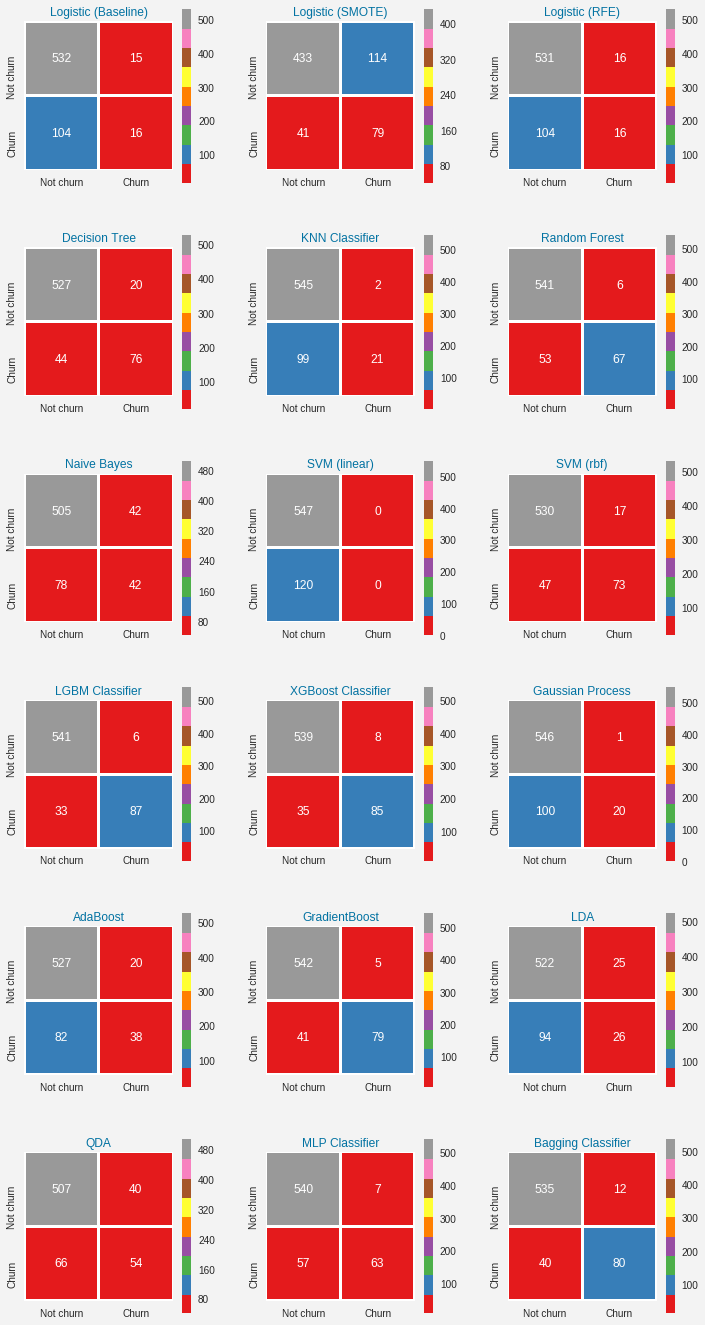

In [43]:
confmatplot(modeldict=models, df_train=[x_train, x_smote], df_test=x_test, 
             target_train=[y_train, y_smote], target_test=y_test, figcolnumber=3)

## <a id='5.4'>5.4. ROC - Curves  for models</a>

In [44]:
def rocplot(modeldict, df_train, df_test, target_train, target_test, figcolnumber):
    fig = plt.figure(figsize=(4*figcolnumber, 4*ceil(len(modeldict)/figcolnumber)))
    fig.set_facecolor("#F3F3F3")
    for name, figpos in itertools.zip_longest(modeldict, range(len(modeldict))):
        qx = plt.subplot(ceil(len(modeldict)/figcolnumber), figcolnumber, figpos+1)
        if name=='Logistic (SMOTE)':
            model = modeldict[name][0].fit(df_train[1][modeldict[name][1]], target_train[1])
            probabilities = model.predict_proba(df_test[modeldict[name][1]])
            predictions = model.predict(df_test[modeldict[name][1]])
                        
            fpr, tpr, thresholds = roc_curve(target_test, probabilities[:,1])
            plt.plot(fpr, tpr, linestyle = "dotted",
                     color = "royalblue", linewidth = 2,
                     label = "AUC = " + str(np.around(roc_auc_score(target_test, predictions), 3)))
            plt.plot([0,1],[0,1], linestyle = "dashed",
                     color = "orangered", linewidth = 1.5)
            plt.fill_between(fpr, tpr, alpha = .1)
            plt.fill_between([0, 1], [0, 1], color = "b")
            plt.legend(loc = "lower right",
                       prop = {"size" : 12})
            qx.set_facecolor("w")
            plt.grid(True, alpha = .15)
            plt.title(name, color = "b")
            plt.xticks(np.arange(0, 1, .3))
            plt.yticks(np.arange(0, 1, .3))
       
        else:
            model = modeldict[name][0].fit(df_train[0][modeldict[name][1]], target_train[0])
            probabilities = model.predict_proba(df_test[modeldict[name][1]])
            predictions = model.predict(df_test[modeldict[name][1]])
                        
            fpr, tpr, thresholds = roc_curve(target_test, probabilities[:,1])
            plt.plot(fpr, tpr, linestyle = "dotted",
                     color = "royalblue", linewidth = 2,
                     label = "AUC = " + str(np.around(roc_auc_score(target_test, predictions), 3)))
            plt.plot([0,1],[0,1], linestyle = "dashed",
                     color = "orangered", linewidth = 1.5)
            plt.fill_between(fpr, tpr, alpha = .1)
            plt.fill_between([0, 1], [0, 1], color = "b")
            plt.legend(loc = "lower right",
                       prop = {"size" : 12})
            qx.set_facecolor("w")
            plt.grid(True, alpha = .15)
            plt.title(name, color = "b")
            plt.xticks(np.arange(0, 1, .3))
            plt.yticks(np.arange(0, 1, .3))

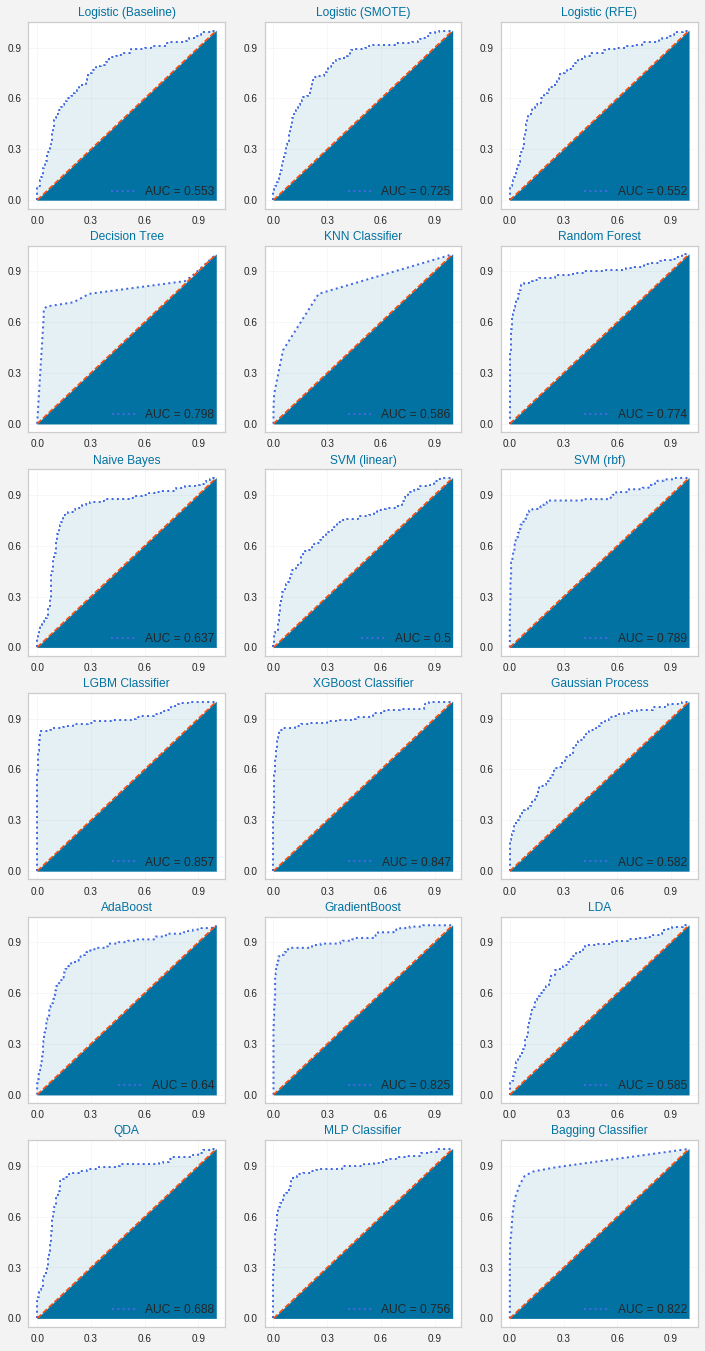

In [45]:
rocplot(modeldict=models, df_train=[x_train, x_smote], df_test=x_test, 
             target_train=[y_train, y_smote], target_test=y_test, figcolnumber=3)

## <a id='5.5'>5.5. Precision recall curves</a>

In [46]:
def prcplot(modeldict, df_train, df_test, target_train, target_test, figcolnumber):
    fig = plt.figure(figsize=(4*figcolnumber, 4*ceil(len(modeldict)/figcolnumber)))
    fig.set_facecolor("#F3F3F3")
    for name, figpos in itertools.zip_longest(modeldict, range(len(modeldict))):
        qx = plt.subplot(ceil(len(modeldict)/figcolnumber), figcolnumber, figpos+1)
        if name=='Logistic (SMOTE)':
            model = modeldict[name][0].fit(df_train[1][modeldict[name][1]], target_train[1])
            probabilities = model.predict_proba(df_test[modeldict[name][1]])
            predictions = model.predict(df_test[modeldict[name][1]])
            
            recall, precision, thresholds = precision_recall_curve(target_test, probabilities[:,1])
            plt.plot(recall, precision, linewidth = 1.5,
                     label = ("avg_pcn: "+str(np.around(average_precision_score(target_test, predictions), 3))))
            plt.plot([0, 1], [0, 0], linestyle = "dashed")
            plt.fill_between(recall, precision, alpha = .1)
            plt.legend(loc = "lower left", prop = {"size": 10})
            qx.set_facecolor("w")
            plt.grid(True, alpha = .15)
            plt.title(name, color = "b")
            plt.xlabel("recall", fontsize=7)
            plt.ylabel("precision", fontsize=7)
            plt.xlim([0.25,1])
            plt.yticks(np.arange(0, 1, .3))
        else:
            model = modeldict[name][0].fit(df_train[0][modeldict[name][1]], target_train[0])
            probabilities = model.predict_proba(df_test[modeldict[name][1]])
            predictions = model.predict(df_test[modeldict[name][1]])
            
            recall, precision, thresholds = precision_recall_curve(target_test, probabilities[:,1])
            plt.plot(recall, precision, linewidth = 1.5,
                     label = ("avg_pcn: "+str(np.around(average_precision_score(target_test, predictions), 3))))
            plt.plot([0, 1], [0, 0], linestyle = "dashed")
            plt.fill_between(recall, precision, alpha = .1)
            plt.legend(loc = "lower left", prop = {"size": 10})
            qx.set_facecolor("w")
            plt.grid(True, alpha = .15)
            plt.title(name, color = "b")
            plt.xlabel("recall", fontsize=7)
            plt.ylabel("precision", fontsize=7)
            plt.xlim([0.25,1])
            plt.yticks(np.arange(0, 1, .3))

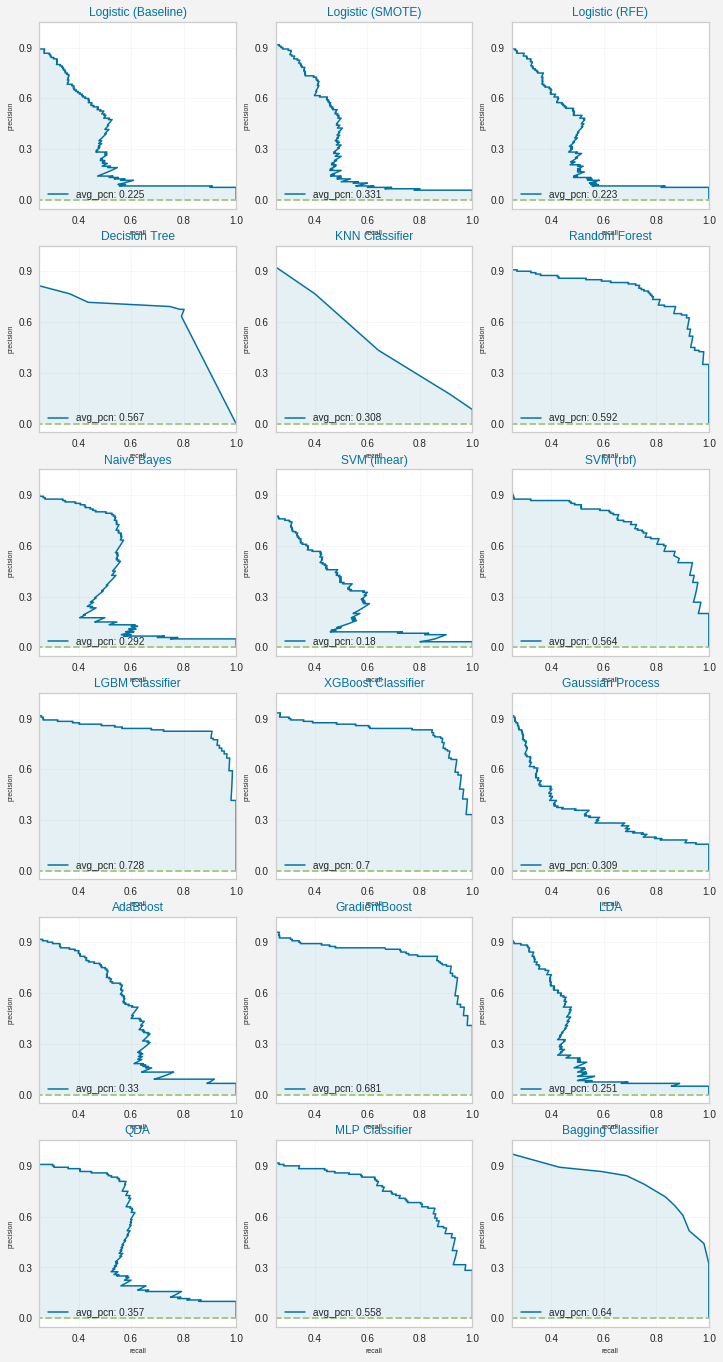

In [47]:
prcplot(modeldict=models, df_train=[x_train, x_smote], df_test=x_test, 
             target_train=[y_train, y_smote], target_test=y_test, figcolnumber=3)

# <a id='6'>6. Model performances over the principal test dataset</a>
## <a id='6.1'>6.1. Model performance metrics</a>

In [48]:
#outputs for all models over the principal test dataset
model_performances_test = pd.DataFrame() 
for name in models:
    if name == 'Logistic (SMOTE)':
        model_performances_test = model_performances_test.append(model_report(models[name][0], 
                                                                              x_smote[models[name][1]], telcom_test[models[name][1]], 
                                                                              y_smote, telcom_test[target_col], name), ignore_index=True)
    else:
        model_performances_test = model_performances_test.append(model_report(models[name][0], 
                                                                              x_train[models[name][1]], telcom_test[models[name][1]], 
                                                                              y_train, telcom_test[target_col], name), ignore_index=True)
        
table_test = ff.create_table(np.round(model_performances_test, 4))
py.iplot(table_test)

## <a id='6.2'>6.2. Compare model metrics</a>

In [49]:
modelmetricsplot(df=model_performances_test, title="Model performances over the principal test dataset")

## <a id='6.3'>6.3. Confusion matrices for models</a>

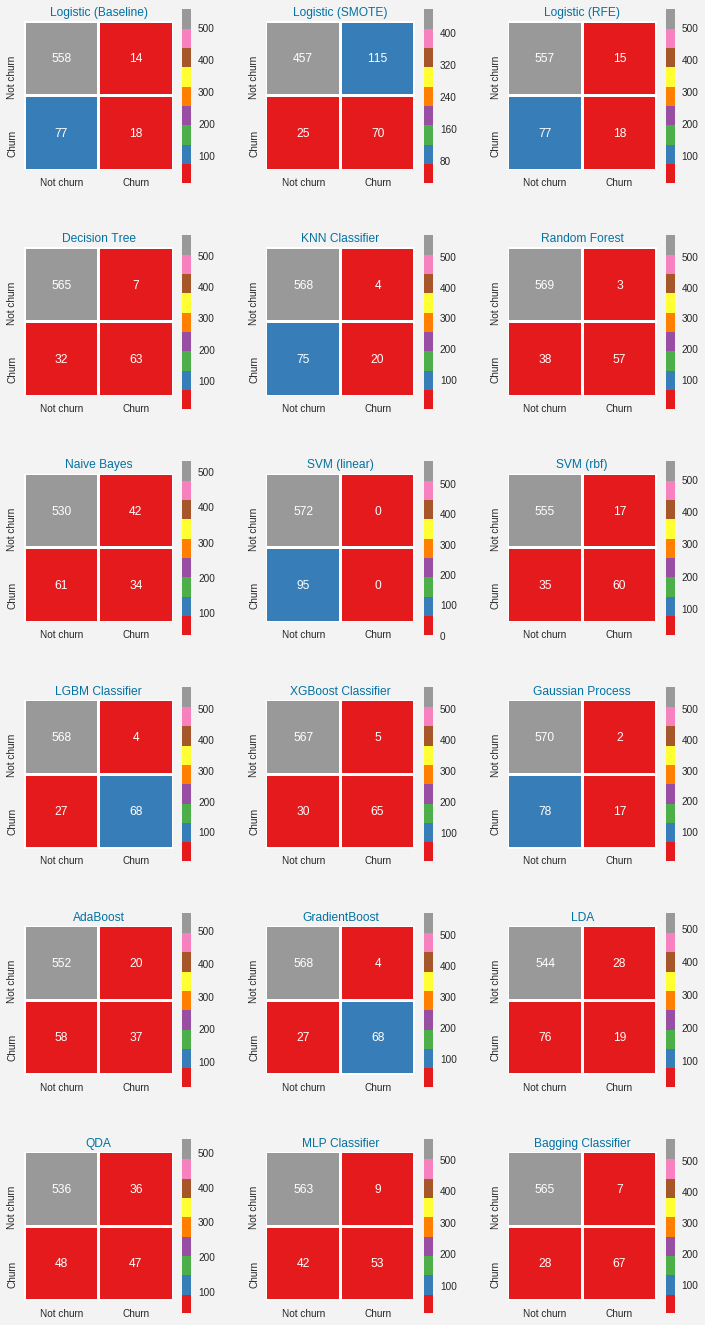

In [50]:
confmatplot(modeldict=models, df_train=[x_train, x_smote], df_test=telcom_test[cols], 
             target_train=[y_train, y_smote], target_test=telcom_test[target_col], figcolnumber=3)

## <a id='6.4'>6.4. ROC - Curves for models</a>

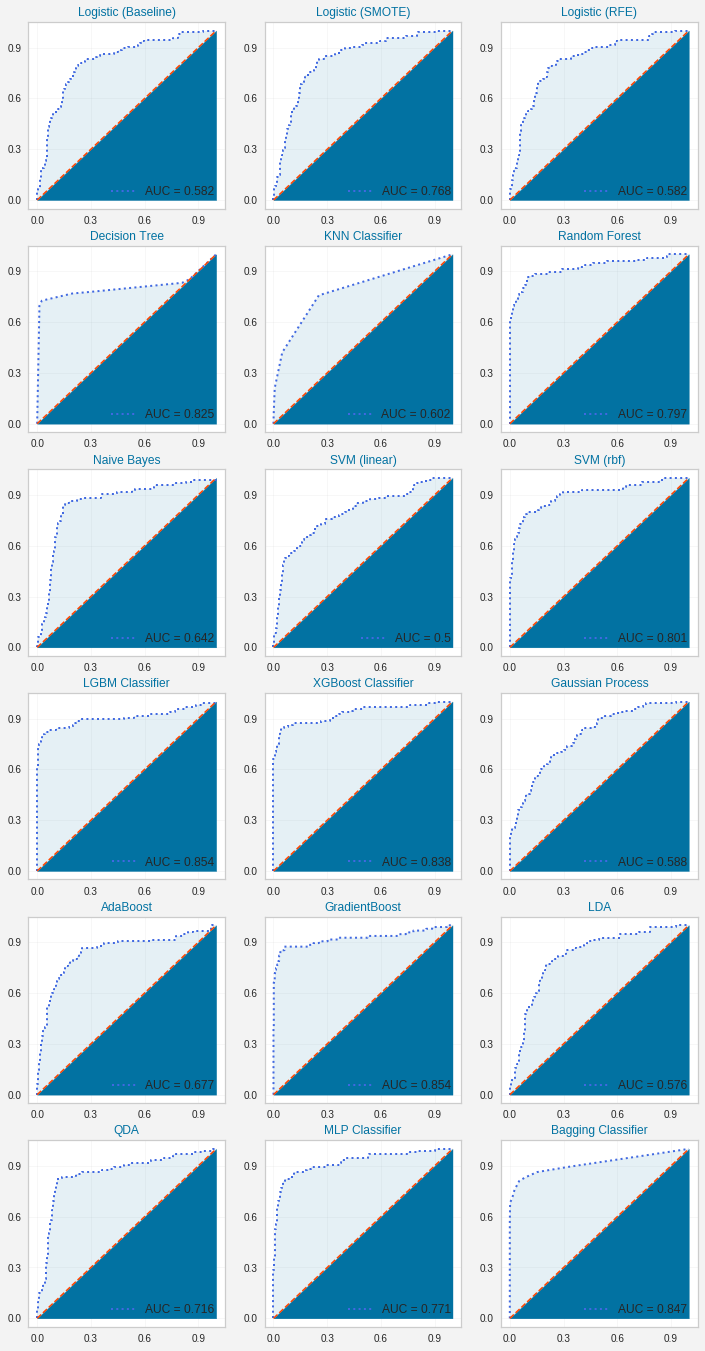

In [51]:
rocplot(modeldict=models, df_train=[x_train, x_smote], df_test=telcom_test[cols], 
             target_train=[y_train, y_smote], target_test=telcom_test[target_col], figcolnumber=3)

## <a id='6.5'>6.5. Precision recall curves</a>

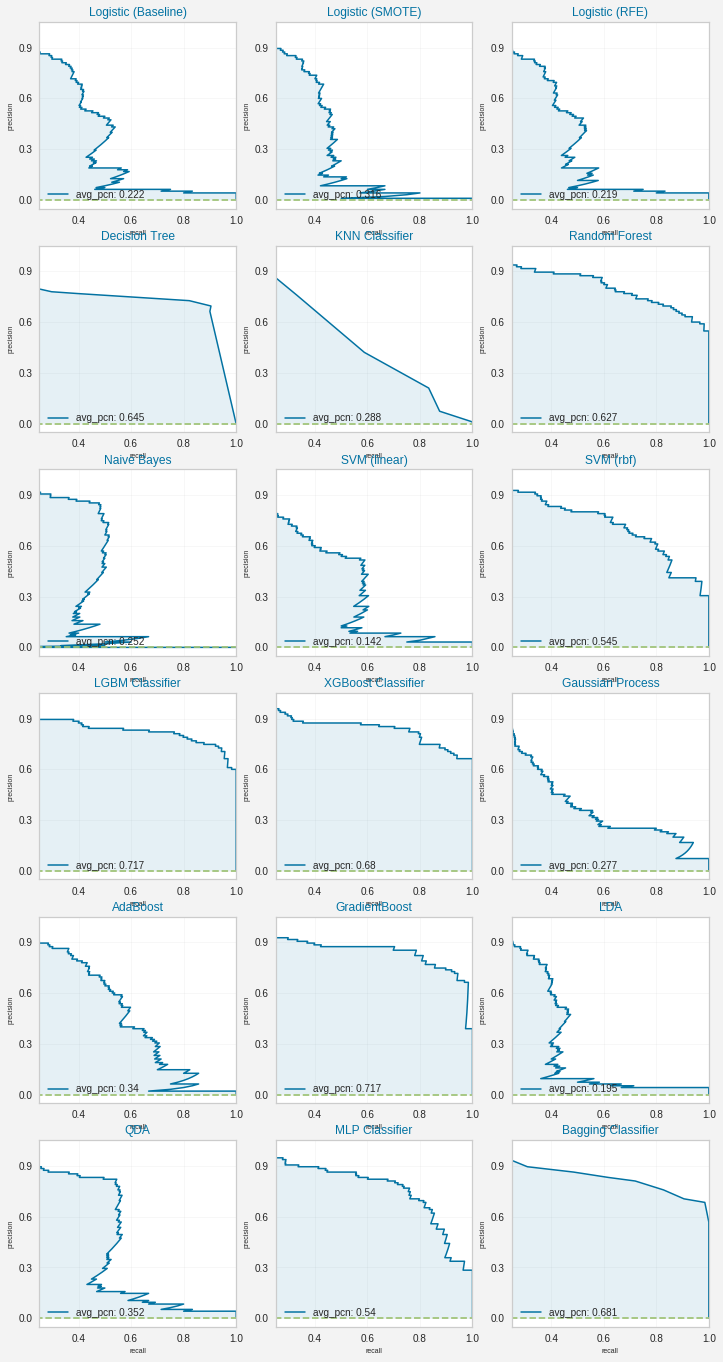

In [52]:
prcplot(modeldict=models, df_train=[x_train, x_smote], df_test=telcom_test[cols], 
             target_train=[y_train, y_smote], target_test=telcom_test[target_col], figcolnumber=3)